# What is Leverage?

Leverage is when borrowed money is used to maximize gains on an investment. Leverage can be understood through purchasing a car. Most people don't buy a car for full value with cash. They might get a car worth 30,000 dollars with a down payment of 6,000 dollars, with the promise of paying the rest of the car's value in a certain amount of time. In this scenario, the car buyer is levered 5:1 as they now have an asset worth 5 times as much as they paid. This becomes advantageous for the buyer if they can sell the car for more than 30,000.  If they sell the car right away for 35,000 dollars, they will profit 5,000 from a 6,000 investment, which is nearly a 100% return on investment. If they originally bought the car for its full value, their return on investment would be significantly less (16.67% compared to 83.33% ROI). The comes when the car depreciates in value significantly before the buyer can sell the car. Now they are losing value in having to pay 30,000 (plus interest) on a car worth maybe half after 5 years. 

In the stock market, leverage is used in many places. One example is in options trading. Options allow investors to control large positions on a stock with less money. Tesla stock is currently at around 219 dollars. Buying 300 shares of this stock will cost 65,700. A lot of people don't have this amount of money to risk and the short term potential gains will be small in comparison. If the stock goes up 5 dollars, that is just 1,500 gain compared to a much larger investment. It is possible to control the same position for about 4,500 dollars in call options over a three month period. Now a 5 point jump will be a much greater return on investment. The flip side to this is that a 5 point drop will put a huge dent in that investment now. 

# Loan Portfolio Concerns

A bank providing leverage to its investors through a loan portfolio will need to take many factors into consideration. The main concern is whether or not the borrowers will be able to pay back their loans. Loan defaults is lost money to those providing the loan. Signs of a potential default include late payments, poor FICO score, high interest rate, loan grade, etc. This notebook performs an analysis on the case study portfolio while taking these factors, plus many others, into consideration.  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
loan_details = pd.read_excel('Loan Data.xlsx', sheetname = 'Loan Details')
loan_payments = pd.read_excel('Loan Data.xlsx', sheetname = 'Loan Payments')
credit_variables = pd.read_excel('Loan Data.xlsx', sheetname = 'Credit Variables')

loan_and_cred_var = pd.merge(loan_details, credit_variables, on='loan_id')

# Summary of Data

First we'll take a look at some visualizations of the loan portfolio to get an idea of what type of loans we're working with. The data consists of some categorical data (grade, loan purpose, etc.) and some numerical data (loan amount, interest rate, etc.)

## Categorical Data

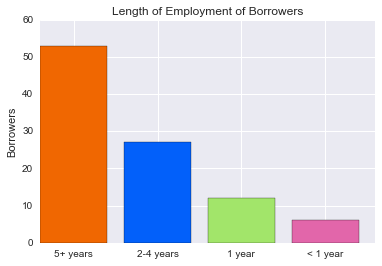

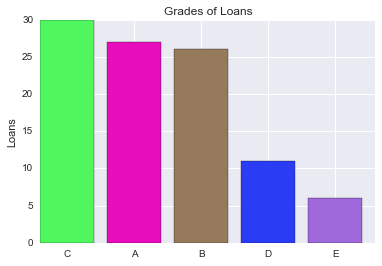

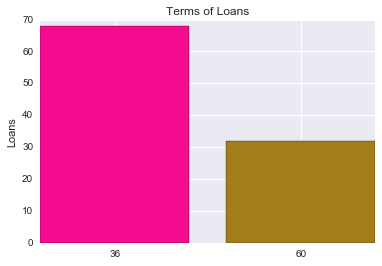

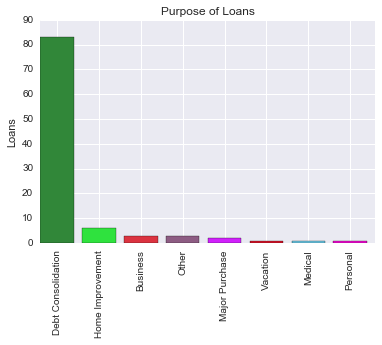

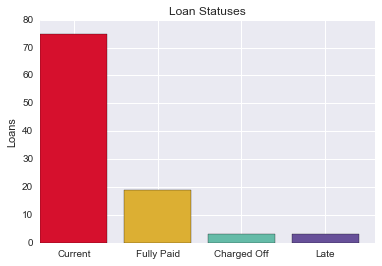

In [3]:
def make_bar(attr, title, ylabel):
    heights = loan_and_cred_var[attr].value_counts().tolist()
    names = []
    for x in loan_and_cred_var[attr].value_counts().keys():
        names.append(x)
        
    for ii, height in enumerate(heights):
        color = np.random.random_sample(3)
        plt.bar(ii, height, color=color)
        
    plt.title(title)
    plt.ylabel(ylabel)
    plt.gca().set_xticklabels(names)
    plt.gca().set_xticks(np.arange(len(names)) + .4)
    if len(names) > 5:
        plt.xticks(rotation=90)
    plt.show()
make_bar('employment_length', 'Length of Employment of Borrowers', 'Borrowers')
make_bar('grade', 'Grades of Loans', 'Loans')
make_bar('term', 'Terms of Loans', 'Loans')
make_bar('loan_purpose', 'Purpose of Loans', 'Loans')
make_bar('loan_status', 'Loan Statuses', 'Loans')

## Numerical Data

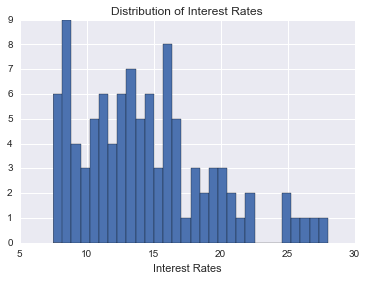

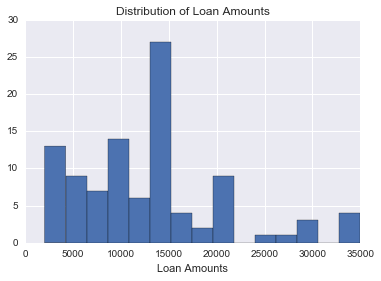

In [4]:
plt.hist(loan_and_cred_var['interest_rate'], bins=30)
plt.title('Distribution of Interest Rates')
plt.xlabel("Interest Rates")
plt.show()

plt.hist(loan_and_cred_var['original_loan_amount'], bins=15)
plt.title('Distribution of Loan Amounts')
plt.xlabel("Loan Amounts")
plt.show()

## Numerical v Categorical

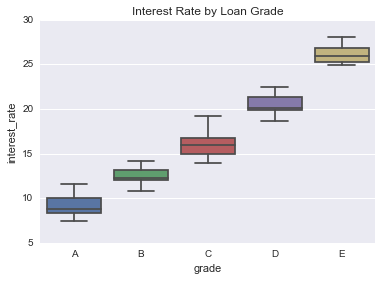

In [5]:
sns.boxplot(x='grade', y='interest_rate', data=loan_and_cred_var, order = 'ABCDE')
plt.title('Interest Rate by Loan Grade')

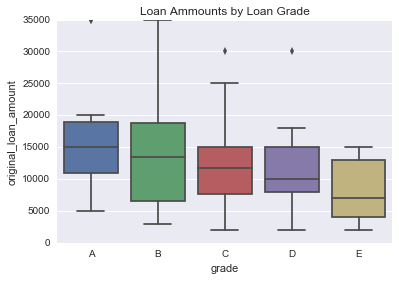

In [6]:
sns.boxplot(x='grade', y='original_loan_amount', data=loan_and_cred_var, order = 'ABCDE')
plt.title('Loan Ammounts by Loan Grade')

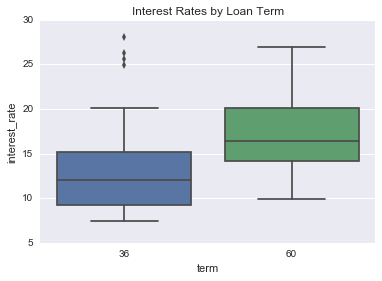

In [7]:
sns.boxplot(x='term', y='interest_rate', data=loan_and_cred_var)
plt.title('Interest Rates by Loan Term')

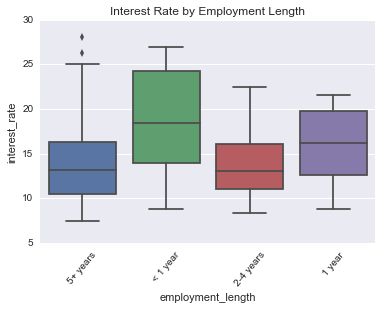

In [8]:
sns.boxplot(x='employment_length', y='interest_rate', data=loan_and_cred_var)
plt.xticks(rotation=50)
plt.title('Interest Rate by Employment Length')

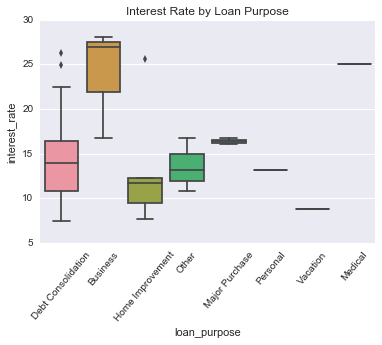

In [9]:
sns.boxplot(x='loan_purpose', y='interest_rate', data=loan_and_cred_var)
plt.xticks(rotation=50)
plt.title('Interest Rate by Loan Purpose')

### Takeaways from Data

The charts above help give a basic idea of what we're working with. Most loans are in the A-C grade range, which is good as this minmizes risk. Most people have also been emplyed for more than 5 years, and most are taking out a loan for debt consolidation. We also see the interest rates rise as the loan grade drops, as you would expect. The interest rate also rises for business related loans and for people employed for a shorter amount of time. 

# Diving into the risk of the portfolio

Now we can take a closer look with this understanding of the data in the back of our mind. What banks and investors will be concerned with is the risk associated with the loans. This means they want to know how likely the borrowers will default on their payments. To do this, we can explore some other fields like FICO score, past delinquencies, and repayment history of all of the loans.

## Late and Charged Off Loans

In [10]:
#these are the loans that are already late on payments or have already been charged off.  Investors won't like these.
late_or_chargeoff = pd.concat([loan_and_cred_var.loc[loan_and_cred_var['loan_status']=='Late'], 
           loan_and_cred_var.loc[loan_and_cred_var['loan_status']=='Charged Off']])
late_or_chargeoff

,loan_id,charge_off_date,days_past_due,grade,interest_rate,loan_status,original_loan_amount,origination_date,origination_fico,pending_principal,...,employment_status,home_ownership,inquiries_6months,inquiries_total,loan_purpose,open_accounts,open_revolving_accounts,public_records_12months,revolving_utilization,total_revolving_balance
14,15,NaT,11,C,19.20,Late,30000,2014-07-11,769.5,20272.15,...,Employed,Own,1,3,Debt Consolidation,5,2,0,98,39790
45,46,NaT,62,C,16.30,Late,20000,2015-05-21,689.5,16418.47,...,Employed,Rent,1,4,Debt Consolidation,14,11,0,17,3843
93,94,NaT,59,B,12.03,Late,20000,2016-03-24,669.5,17755.77,...,Employed,Own,1,2,Debt Consolidation,5,5,0,62,17931
1,2,2015-04-01,0,E,26.94,Charged Off,10000,2014-01-10,669.5,0.00,...,Employed - Self,Rent,1,9,Business,11,8,0,50,6849
24,25,2016-10-01,0,C,15.70,Charged Off,10000,2014-11-03,669.5,0.00,...,Employed,Own,2,9,Debt Consolidation,9,6,0,72,29493
44,45,2016-09-01,0,B,12.59,Charged Off,4000,2015-05-14,749.5,0.00,...,Employed - Self,Rent,0,2,Debt Consolidation,6,6,0,28,3164


We see in a portfolio of 100 loans, 3 are late and 3 are 'Charged Off', which shows that at least 3-6% of the portfolio is already delinquent.

In [11]:
late_or_chargeoff['total_charge_off_amount'].sum()

17619.92

17,619.92 out of 24,000 in total original loan amount will not be paid back from those charge offs.

## FICO Scores

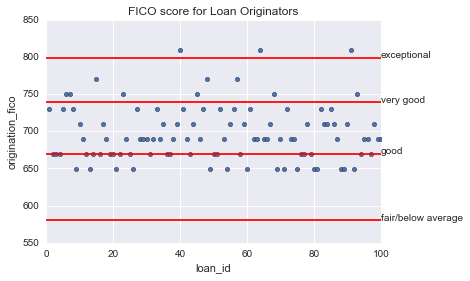

In [12]:
loan_details.plot(x='loan_id', y='origination_fico', kind='scatter', title='FICO score for Loan Originators', xlim=(0,100))
plt.axhline(y=799, color='r')
plt.text(100, 799, 'exceptional')
plt.axhline(y=739, color='r')
plt.text(100, 739, 'very good')
plt.axhline(y=670, color='r')
plt.text(100, 670, 'good')
plt.axhline(y=580, color='r')
plt.text(100, 580, 'fair/below average')

In [13]:
loan_details['origination_fico'].describe()

count    100.000000
mean     696.700000
std       37.337662
min      649.500000
25%      669.500000
50%      689.500000
75%      714.500000
max      809.500000
Name: origination_fico, dtype: float64

A quick look at the FICO scores of the borrowers tells that the average borrower in this portfolio is 696.7 which is a good score. Based on the Experian definitions, only 8% of loans in the 670 to 739 range are likely to become delinquent. We do see, however, that the bottom 25% of these borrowers have average FICO scores (580-669 range) which, by Experian definition, have 28% chance of becoming delinquent.

## Bankcard Utilization

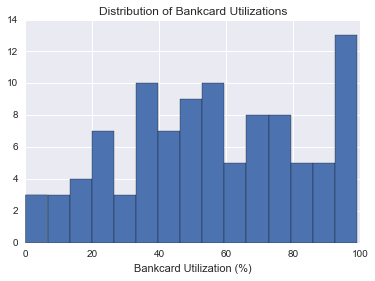

In [14]:
plt.hist(loan_and_cred_var['bankcard_utilization'], bins=15)
plt.title('Distribution of Bankcard Utilizations')
plt.xlabel("Bankcard Utilization (%)")
plt.show()

This is concerning to me. The large portion of borrowers here are using nearly 100% of their max credit limit. This is a sign of irresponsible borrowers who could likely have trouble paying back loans.

## Borrower Income

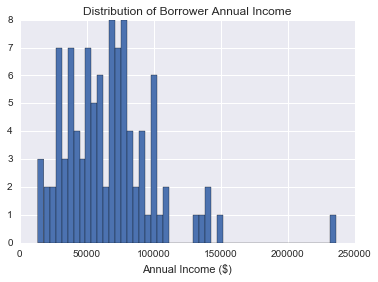

In [15]:
plt.hist(loan_and_cred_var['annual_income'], bins=50)
plt.title('Distribution of Borrower Annual Income')
plt.xlabel("Annual Income ($)")
plt.show()

We see here that most borrowers make at least 50,000. Not the best indicator of credit worthiness. Still, there are a number of people who make well below 50,000, which can make paying back loans difficult. 

## Delinquent Accounts

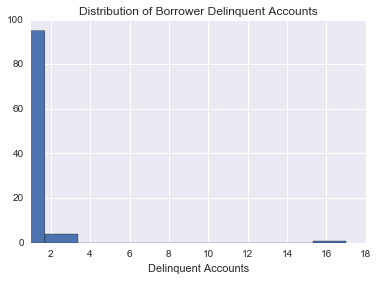

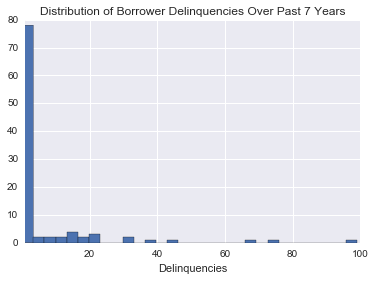

In [16]:
plt.hist(loan_and_cred_var['delinquent_accounts'], bins=10)
plt.xlim(1,18)
plt.title('Distribution of Borrower Delinquent Accounts')
plt.xlabel("Delinquent Accounts")
plt.show()

plt.hist(loan_and_cred_var['delinquencies_7years'], bins=30)
plt.xlim(1,100)
plt.title('Distribution of Borrower Delinquencies Over Past 7 Years')
plt.xlabel("Delinquencies")
plt.show()

Most accounts have little to any delinquencies, which is a good sign. Those borrowers with many delinquencies are concerning.

# Payment History Analysis

Now that we have seen some warning signs in the data that would concern an investor about this portfolio, we should dive into the actual history of payments made on these loans thus far. We have already seen that some borrowers are either late on payments or have been charged off. 

Now we want to look for people who might not be making their full scheduled payments. This could mean they will eventually fall too far behind with interest piling up and end up defaulting later on in the loan period. 

Another concern is when the borrower pays off their loan in full very early in their loan term. This can happen if they end up refinancing their loan for a better interest rate. This is bad for investors because they lose out on the interest payments.

## Loans Behind on Schedule

In [17]:
from __future__ import division
loan_payments['tot_payment_received'] = loan_payments['fees_received'] + loan_payments['interest_received'] + loan_payments['prepayment_received'] + loan_payments['principal_paid'] + loan_payments['service_fees_paid']
def loans_not_on_payment_schedule():
    falling_behind = [] #array of loans that are falling behind on payments
    for loan_id in range(1,100):
        loan = loan_payments[loan_payments['loan_id']==loan_id]
        payment_rec = loan['tot_payment_received'].sum()
        scheduled_pay = loan['scheduled_payment'].sum()
        if ((payment_rec/scheduled_pay)<0.85): #test to see if borrower has paid at least 80% of their scheduled amount to date
            falling_behind.append(loan_id) 
    return falling_behind

print loans_not_on_payment_schedule()

[2, 25, 45, 94, 97]


The function above goes through each loan amortization schedule to see if the borrower is falling behind on payments. I use arbitrary criteria to see if they have paid at least 85% of their scheduled amount to date. This could be too generous or not generous enough, but this criteria can be adjusted. Here we see 5 loans are "behind schedule". Of the 5, we already know 3 are charged off and 1 is late. Loan 97 is only 4 months into their loan term so they have plenty of time to make up a missed payment.

## Loans Paid Off Early

In [18]:
loan_payments['Early Payoff']=0
loan_payments['Early Payoff'].loc[(loan_payments['prepayment_received']>(loan_payments['pending_balance_beg_month']*0.7))&(loan_payments['pending_balance_beg_month']>-0.01)]=1
print 'Loans Paid off Early: ',  loan_payments['Early Payoff'].sum()

Loans Paid off Early:  19


C:\Users\yanke_000\Anaconda2\lib\site-packages\pandas\core\indexing.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [19]:
loan_payments[loan_payments['Early Payoff']==1]

,loan_id,charge_off_amount,date_month,fees_received,interest_received,months_on_book,pending_balance_beg_month,pending_balance_end_month,prepayment_received,principal_paid,recoveries_amount,recoveries_fee,remaining_term,scheduled_interest_payment,scheduled_payment,scheduled_principal_payment,service_fees_paid,tot_payment_received,Early Payoff
11,1,0.0,2014-12-01,0.0,251.69,11,17310.27,0.00,17029.12,17310.27,0,0,49,142.81,423.96,281.15,25.43,34616.51,1
82,3,0.0,2015-03-01,0.0,43.05,14,7040.32,0.00,6759.52,7040.32,0,0,22,54.56,335.37,280.80,4.63,13847.52,1
111,4,0.0,2014-10-01,0.0,203.45,9,9180.08,0.00,9069.79,9180.08,0,0,51,159.12,269.41,110.29,9.79,18463.11,1
249,8,0.0,2015-10-01,0.0,50.22,18,3165.77,0.00,3110.55,3165.77,0,0,42,41.42,96.64,55.22,3.20,6329.74,1
335,11,0.0,2015-05-01,0.0,21.43,12,11188.13,0.00,10778.59,11188.13,0,0,24,81.49,491.02,409.54,2.45,21990.60,1
422,14,0.0,2015-06-01,0.0,44.65,11,4536.18,23.05,4358.83,4513.13,0,0,25,43.81,198.11,154.30,3.85,8920.46,1
510,17,0.0,2015-11-01,0.0,110.44,15,10269.73,-0.01,9837.68,10269.74,0,0,21,74.80,506.86,432.06,12.63,20230.49,1
566,19,0.0,2016-01-01,0.0,153.97,17,9031.56,0.00,8624.14,9031.56,0,0,19,101.61,509.03,407.42,11.40,17821.07,1
616,21,0.0,2015-11-01,0.0,85.58,14,4221.95,0.00,4069.15,4221.95,0,0,22,68.96,221.76,152.80,4.37,8381.05,1
745,26,0.0,2016-03-01,0.0,52.22,16,2864.99,597.21,2021.70,2267.78,0,0,20,42.74,288.82,246.08,2.92,4344.62,1


Above you can see a collection of loans where a significant portion is paid off early in the term. Again I use an arbitrary value as criteria, but I look for "Prepayments" that exceed 70% of the month's beginning balance. With this criteria I was able to obtain a list of 19 loans that were paid off early. You can see from the "months_on_book" column that some of these are made within the first year of obtaining the loan. In these cases, a large portion of the interest the was supposed to accumulate for the duration of the loan term will not be collected.

# Portfolio Performance to Date

Now I'll look at how much in payments have been received to date vs. the total amount in loans given out how much was expected to be received. This should give a rough idea of the portfolio's returns.

In [20]:
from datetime import datetime
from dateutil import relativedelta
loan_details['months_on_book'] = (2016 - loan_details['origination_date'].dt.year)*12 + (10 - loan_details['origination_date'].dt.month)
loan_details['Expected Payment to Date'] = loan_details['months_on_book'] * loan_details['scheduled_monthly_payment']
loan_details['Actual Received'] = loan_details['total_principal_paid'] + loan_details['total_interest_received']
loan_details['Expected total Payment'] = loan_details['term'] * loan_details['scheduled_monthly_payment'] + loan_details['total_service_fee']
loan_details=loan_details.round(2)
loan_details.head()

,loan_id,charge_off_date,days_past_due,grade,interest_rate,loan_status,original_loan_amount,origination_date,origination_fico,pending_principal,...,late_fees,total_interest_received,total_principal_paid,total_recoveries_amount,total_recoveries_fee,total_service_fee,months_on_book,Expected Payment to Date,Actual Received,Expected total Payment
0,1,NaT,0,A,9.90,Fully Paid,20000,2014-01-06,729.5,0.00,...,0.0,1796.14,20000.00,0,0,181.99,33,13990.60,21796.14,25619.44
1,2,2015-04-01,0,E,26.94,Charged Off,10000,2014-01-10,669.5,0.00,...,0.0,2147.94,894.58,0,0,79.99,33,10064.83,3042.52,18379.68
2,3,NaT,0,A,9.30,Fully Paid,10500,2014-01-15,669.5,0.00,...,0.0,940.50,10500.00,0,0,101.42,33,11067.05,11440.50,12174.57
3,4,NaT,0,D,20.80,Fully Paid,10000,2014-01-15,669.5,0.00,...,0.0,1538.81,10000.00,0,0,73.98,33,8890.52,11538.81,16238.57
4,5,NaT,0,B,14.00,Current,30000,2014-02-13,729.5,16088.38,...,0.0,9097.52,13911.62,0,0,650.65,32,22337.52,23009.14,42533.50


In [21]:
total_loan_amount = loan_details['original_loan_amount'].sum()
print "Total Amount in Loans: ", total_loan_amount

Total Amount in Loans:  1321654


In [22]:
total_received = loan_details['Actual Received'].sum()
print "Received so Far (October 2016): ", total_received

Received so Far (October 2016):  774735.9


In [24]:
expected_by_oct = loan_details['Expected Payment to Date'].sum()
print "Expected to be Received by October 2016: ", expected_by_oct

Expected to be Received by October 2016:  647237.87


In [25]:
still_to_rec = loan_details.loc[(loan_details['loan_status']!='Fully Paid') & (loan_details['loan_status']!='Charged Off')]
payments_pending = still_to_rec['Expected total Payment'].sum() - still_to_rec['Actual Received'].sum()
print "Payments to be Received Pending No Further Charge Offs or Early Pay Offs: ", payments_pending

Payments to be Received Pending No Further Charge Offs or Early Pay Offs:  887763.87


In [26]:
still_to_rec['Expected total Payment'].sum()

1363127.52

In [27]:
still_to_rec['Actual Received'].sum()

475363.65000000014

In [28]:
max_ret = total_received+payments_pending-total_loan_amount
print "Maximum Return on Portfolio: ", max_ret

Maximum Return on Portfolio:  340845.77


In [29]:
print "Maximum Return on Portfolio as Percent: ", round((max_ret/total_loan_amount)*100, 2)

Maximum Return on Portfolio as Percent:  25.79


# Summary of Findings

After looking at the performance of this portfolio to date, it looks like there is still potential for high returns. This is assuming no more charge offs or early pay offs, so 25% returns are not to be expected realistically. With all factors considered, the portfolio certainly has its red flags, especially with the number of loans paid off early so far. Some of the borrowers have some questionable credit history to be considered as well when looking at bankcard utilization and the number of delinquent accounts. 